In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl
import matplotlib.image as mpimg
from skimage.transform import resize

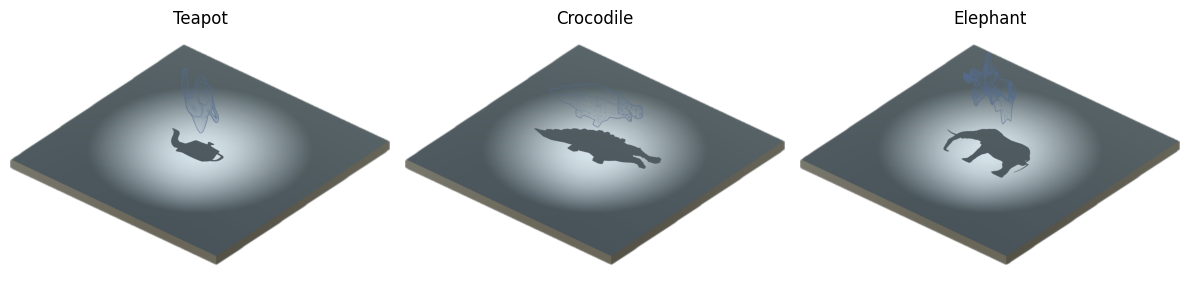

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
fig.set_dpi(100)
axes[0].imshow(mpimg.imread("../plots/teapot-3Dview.png"))
axes[0].axis("off")
axes[0].set_title("Teapot")
axes[1].imshow(mpimg.imread("../plots/crocodile-3Dview.png"))
axes[1].axis("off")
axes[1].set_title("Crocodile")
axes[2].imshow(mpimg.imread("../plots/elephant-3Dview.png"))
axes[2].axis("off")
axes[2].set_title("Elephant")
# im = mpimg.imread("../plots/agent-view.png")
# im = resize(im, (im.shape[0]//2, im.shape[1]//2))
# axes[3].imshow(mpimg.imread("../plots/agent-view.png"))
# axes[3].axis("off")
# axes[3].set_title("Agent view")
plt.tight_layout()
plt.savefig("../plots/3Dviews-all.png", dpi=300, bbox_inches="tight")
plt.show()

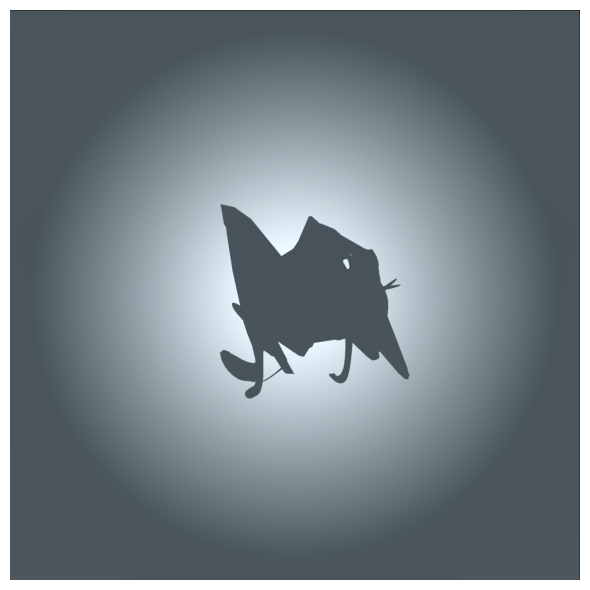

In [19]:
fig = plt.figure(figsize=(6, 6))
fig.set_dpi(100)
im = mpimg.imread("../plots/agent-view.png")
# make image gray scale
# im = im.mean(axis=2)
plt.imshow(im, cmap="gray")
# gray scale
plt.set_cmap("gray")
plt.axis("off")
plt.tight_layout()
plt.savefig("../plots/agent-view-plot.png", dpi=300, bbox_inches="tight")
plt.show()

In [6]:
# load shadowagent3 data
df3_teapot = pl.read_csv("../data/ShadowAgent3Teapot_cumr.csv")
df3_crocodile = pl.read_csv("../data/ShadowAgent3Crocodile_cumr.csv")
df3_elephant = pl.read_csv("../data/ShadowAgent3Elephant_cumr.csv")

In [7]:
df3_crocodile.head()

Wall time,Step,Value
f64,i64,f64
1.7156e9,2500,1.235808
1.7156e9,5000,0.0
1.7156e9,7500,0.0
1.7156e9,10000,20.347414
1.7156e9,12500,1.490907


In [8]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)  # Save it
        last = smoothed_val  # Anchor the last smoothed value

    return smoothed

In [9]:
# apply smoothing to the data
smoothed_values = pl.Series(
    "smoothed_value", smooth(df3_teapot["Value"].to_numpy(), 0.6)
)
df3_teapot = df3_teapot.with_columns([smoothed_values])

smoothed_values = pl.Series(
    "smoothed_value", smooth(df3_crocodile["Value"].to_numpy(), 0.6)
)
df3_crocodile = df3_crocodile.with_columns([smoothed_values])

smoothed_values = pl.Series(
    "smoothed_value", smooth(df3_elephant["Value"].to_numpy(), 0.6)
)
df3_elephant = df3_elephant.with_columns([smoothed_values])

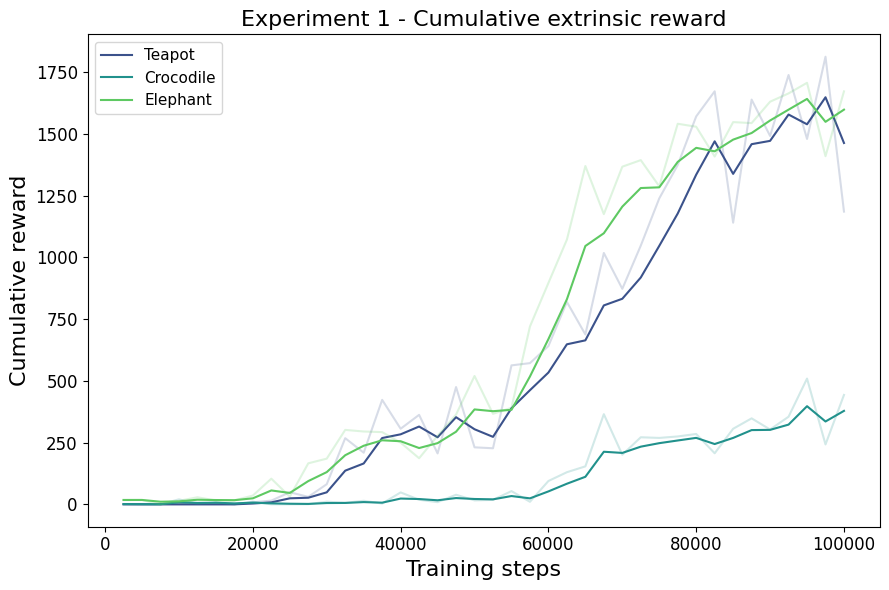

In [26]:
# seaborne cumulative reward plot
fig = plt.figure(figsize=(9, 6))
# apply smoothing to the data
colors = sns.color_palette("viridis", 3)
sns.lineplot(
    data=df3_teapot, x="Step", y="smoothed_value", label="Teapot", color=colors[0]
)
sns.lineplot(data=df3_teapot, x="Step", y="Value", color=colors[0], alpha=0.2)
sns.lineplot(
    data=df3_crocodile, x="Step", y="smoothed_value", label="Crocodile", color=colors[1]
)
sns.lineplot(data=df3_crocodile, x="Step", y="Value", color=colors[1], alpha=0.2)
sns.lineplot(
    data=df3_elephant, x="Step", y="smoothed_value", label="Elephant", color=colors[2]
)
sns.lineplot(data=df3_elephant, x="Step", y="Value", color=colors[2], alpha=0.2)
plt.title("Experiment 1 - Cumulative extrinsic reward", fontsize=16)
plt.xlabel("Training steps", fontsize=16)
plt.ylabel("Cumulative reward", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig("../plots/exp1-cumr.png", dpi=300, bbox_inches="tight")
plt.show()

In [14]:
df4_all = pl.read_csv("../data/ShadowAgent4All_cumr.csv")
smoothed_values = pl.Series("smoothed_value", smooth(df4_all["Value"].to_numpy(), 0.6))
df4_all = df4_all.with_columns([smoothed_values])

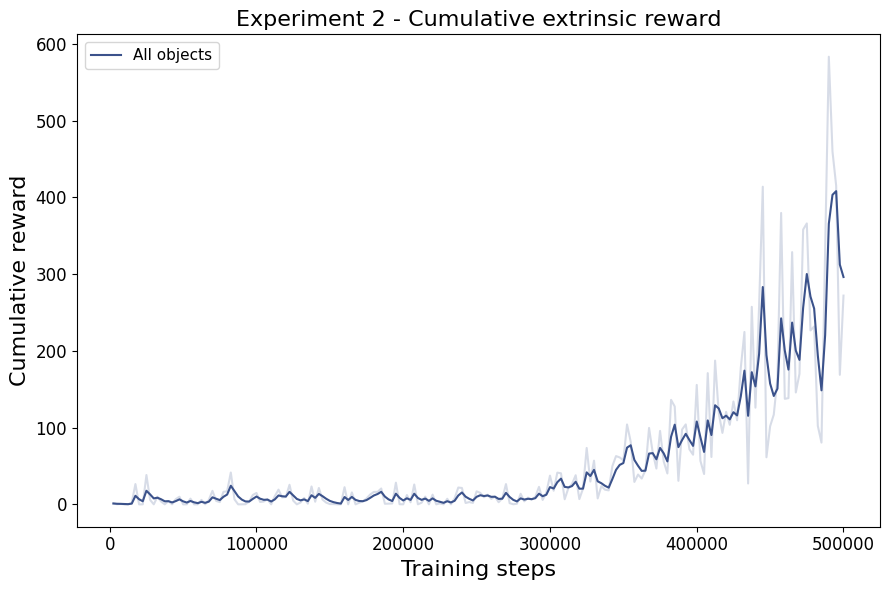

In [25]:
fig = plt.figure(figsize=(9, 6))
colors = sns.color_palette("viridis", 3)
sns.lineplot(
    data=df4_all, x="Step", y="smoothed_value", label="All objects", color=colors[0]
)
sns.lineplot(data=df4_all, x="Step", y="Value", color=colors[0], alpha=0.2)
plt.title("Experiment 2 - Cumulative extrinsic reward", fontsize=16)
plt.xlabel("Training steps", fontsize=16)
plt.ylabel("Cumulative reward", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig("../plots/exp2-cumr.png", dpi=300, bbox_inches="tight")
plt.show()

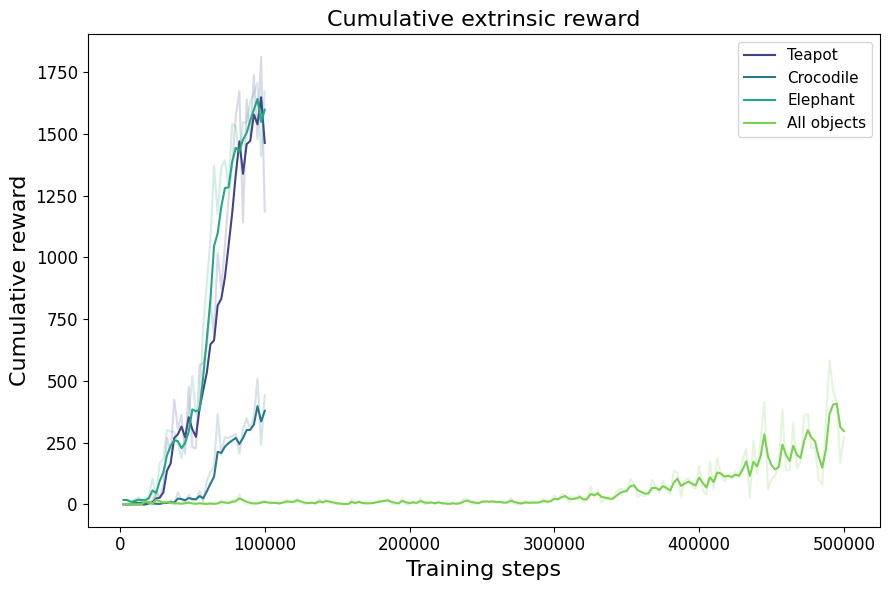

In [30]:
# plot all the cumulative rewards
fig = plt.figure(figsize=(9, 6))
colors = sns.color_palette("viridis", 4)
sns.lineplot(
    data=df3_teapot, x="Step", y="smoothed_value", label="Teapot", color=colors[0]
)
sns.lineplot(data=df3_teapot, x="Step", y="Value", color=colors[0], alpha=0.2)
sns.lineplot(
    data=df3_crocodile, x="Step", y="smoothed_value", label="Crocodile", color=colors[1]
)
sns.lineplot(data=df3_crocodile, x="Step", y="Value", color=colors[1], alpha=0.2)
sns.lineplot(
    data=df3_elephant, x="Step", y="smoothed_value", label="Elephant", color=colors[2]
)
sns.lineplot(data=df3_elephant, x="Step", y="Value", color=colors[2], alpha=0.2)
sns.lineplot(
    data=df4_all, x="Step", y="smoothed_value", label="All objects", color=colors[3]
)
sns.lineplot(data=df4_all, x="Step", y="Value", color=colors[3], alpha=0.2)
plt.title("Cumulative extrinsic reward", fontsize=16)
plt.xlabel("Training steps", fontsize=16)
plt.ylabel("Cumulative reward", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig("../plots/all-cumr-single.png", dpi=300, bbox_inches="tight")
plt.show()

In [27]:
df5_all = pl.read_csv("../data/ShadowAgent5All_cumr.csv")
smoothed_values = pl.Series("smoothed_value", smooth(df5_all["Value"].to_numpy(), 0.6))
df5_all = df5_all.with_columns([smoothed_values])

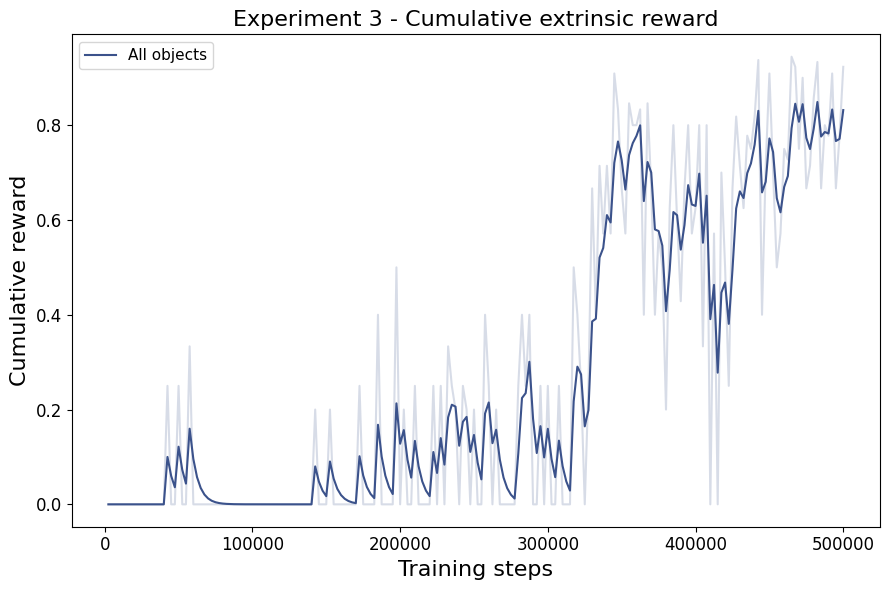

In [29]:
fig = plt.figure(figsize=(9, 6))
colors = sns.color_palette("viridis", 3)
sns.lineplot(
    data=df5_all, x="Step", y="smoothed_value", label="All objects", color=colors[0]
)
sns.lineplot(data=df5_all, x="Step", y="Value", color=colors[0], alpha=0.2)
plt.title("Experiment 3 - Cumulative extrinsic reward", fontsize=16)
plt.xlabel("Training steps", fontsize=16)
plt.ylabel("Cumulative reward", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig("../plots/exp3-cumr.png", dpi=300, bbox_inches="tight")
plt.show()